In [1]:
from pyforest import *
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,f1_score

In [2]:
data=pd.read_csv("Data.csv")

In [3]:
data_org=data.copy()

In [293]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [8]:
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [295]:
data.isnull().sum().sort_values(ascending=False)

Medical_History_10     58824
Medical_History_32     58274
Medical_History_24     55580
Medical_History_15     44596
Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
Employment_Info_6      10854
Medical_History_1       8889
Employment_Info_4       6779
Employment_Info_1         19
Medical_History_19         0
Medical_History_7          0
Medical_History_23         0
Medical_History_22         0
Medical_History_2          0
Medical_History_3          0
Medical_History_4          0
Medical_History_5          0
Medical_History_6          0
Medical_History_9          0
Medical_History_8          0
Medical_History_18         0
Medical_History_21         0
Family_Hist_1              0
Medical_History_12         0
Medical_History_13         0
Medical_History_14         0
                       ...  
Medical_Keyword_1          0
Medical_History_28         0
Medical_History_29         0
Medical_Histor

In [11]:
#percent of mising value
(data.isnull().sum().sort_values(ascending=False)*100)/data.shape[0]

Medical_History_10     99.061990
Medical_History_32     98.135767
Medical_History_24     93.598963
Medical_History_15     75.101463
Family_Hist_5          70.411411
Family_Hist_3          57.663226
Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
Employment_Info_1       0.031997
Medical_History_19      0.000000
Medical_History_7       0.000000
Medical_History_23      0.000000
Medical_History_22      0.000000
Medical_History_2       0.000000
Medical_History_3       0.000000
Medical_History_4       0.000000
Medical_History_5       0.000000
Medical_History_6       0.000000
Medical_History_9       0.000000
Medical_History_8       0.000000
Medical_History_18      0.000000
Medical_History_21      0.000000
Family_Hist_1           0.000000
Medical_History_12      0.000000
Medical_History_13      0.000000
Medical_History_14      0.000000
          

In [12]:
data.shape#original shape of dataset

(59381, 128)

In [4]:
#drop id columns asit dont give any meaningful data
data=data.drop("Id",axis=1)

In [297]:
#response is our target variable so let check weather it is balnced or not
data["Response"].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

the target variableis not balance som we need to use smote

drop all columns having more than 50% null value

In [5]:
#drop all columns having more than 50% null value
data=data.drop(["Medical_History_10","Medical_History_32","Medical_History_24","Medical_History_15","Family_Hist_5","Family_Hist_3"],axis=1)

In [21]:
data.shape

(59381, 121)

# imputing

In [299]:
#percent of mising value
(data.isnull().sum().sort_values(ascending=False)*100)/data.shape[0]

Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
Employment_Info_1       0.031997
Response                0.000000
Medical_History_7       0.000000
Medical_History_9       0.000000
Medical_History_8       0.000000
Medical_History_4       0.000000
Medical_History_6       0.000000
Medical_History_5       0.000000
Medical_History_3       0.000000
Medical_History_2       0.000000
Medical_History_11      0.000000
Medical_History_12      0.000000
Insurance_History_9     0.000000
Medical_History_13      0.000000
Medical_History_14      0.000000
Medical_History_16      0.000000
Medical_History_17      0.000000
Medical_History_18      0.000000
Medical_History_19      0.000000
Medical_History_20      0.000000
Medical_History_21      0.000000
Medical_History_22      0.000000
Medical_History_23      0.000000
Medical_History_25      0.000000
          

In [300]:
data1=data.copy()

In [26]:
#EMPLOYMENT 6
from statsmodels.formula.api import ols
import statsmodels.api as sms

model=ols("Employment_Info_6~C(Employment_Info_5)+C(Employment_Info_3)+C(Employment_Info_5):C(Employment_Info_3)",data=data).fit()
print(sms.stats.anova_lm(model))

                                                df       sum_sq    mean_sq  \
C(Employment_Info_5)                           1.0     7.123839   7.123839   
C(Employment_Info_3)                           1.0    18.558037  18.558037   
C(Employment_Info_5):C(Employment_Info_3)      1.0     5.020550   5.020550   
Residual                                   48523.0  5898.500442   0.121561   

                                                    F        PR(>F)  
C(Employment_Info_5)                        58.603035  1.964775e-14  
C(Employment_Info_3)                       152.664500  5.120557e-35  
C(Employment_Info_5):C(Employment_Info_3)   41.300688  1.317299e-10  
Residual                                          NaN           NaN  


In [27]:
#EMPLOYEMENT 4
from statsmodels.formula.api import ols
import statsmodels.api as sms

model=ols("Employment_Info_4~C(Employment_Info_5)+C(Employment_Info_3)+C(Employment_Info_5):C(Employment_Info_3)",data=data).fit()
print(sms.stats.anova_lm(model))

                                                df     sum_sq   mean_sq  \
C(Employment_Info_5)                           1.0   0.018473  0.018473   
C(Employment_Info_3)                           1.0   0.922923  0.922923   
C(Employment_Info_5):C(Employment_Info_3)      1.0   0.095162  0.095162   
Residual                                   52598.0  55.610580  0.001057   

                                                    F         PR(>F)  
C(Employment_Info_5)                        17.472598   2.919494e-05  
C(Employment_Info_3)                       872.926036  2.733946e-190  
C(Employment_Info_5):C(Employment_Info_3)   90.006864   2.468512e-21  
Residual                                          NaN            NaN  


In [28]:
#EMPPLOYMENT 1
from statsmodels.formula.api import ols
import statsmodels.api as sms

model=ols("Employment_Info_1~C(Employment_Info_5)+C(Employment_Info_3)+C(Employment_Info_5):C(Employment_Info_3)",data=data).fit()
print(sms.stats.anova_lm(model))

                                                df      sum_sq    mean_sq  \
C(Employment_Info_5)                           1.0   15.859063  15.859063   
C(Employment_Info_3)                           1.0   11.240905  11.240905   
C(Employment_Info_5):C(Employment_Info_3)      1.0    1.174010   1.174010   
Residual                                   59358.0  374.251951   0.006305   

                                                     F        PR(>F)  
C(Employment_Info_5)                       2515.316934  0.000000e+00  
C(Employment_Info_3)                       1782.856872  0.000000e+00  
C(Employment_Info_5):C(Employment_Info_3)   186.203078  2.483848e-42  
Residual                                           NaN           NaN  


In [32]:

dt6=data[["Employment_Info_6","Employment_Info_4","Employment_Info_5","Employment_Info_3","Employment_Info_1"]].dropna()

x=dt6[["Employment_Info_3"]]
y=dt6["Employment_Info_6"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.3)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx_train=sc.fit_transform(x_train)
sx_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf_4=rf.fit(sx_train,y_train)
model_rf_4.score(sx_test,y_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0008647719969688827

In [ ]:
as the score are too low we drop this idea to impute value "Employment_Info_6","Employment_Info_4","Employment_Info_1"

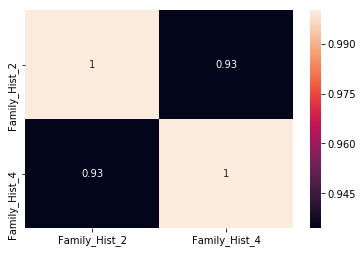

In [33]:
sns.heatmap(data[["Family_Hist_2","Family_Hist_4"]].corr(),annot=True)

In [34]:
dt6=data[["Family_Hist_2","Family_Hist_4"]].dropna()
x=dt6[["Family_Hist_2"]]
y=dt6["Family_Hist_4"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.3)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx_train=sc.fit_transform(x_train)
sx_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf_4=rf.fit(sx_train,y_train)
model_rf_4.score(sx_test,y_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8744536654413566

In [35]:
dt6=data[["Family_Hist_2","Family_Hist_4"]].dropna()
x=dt6[["Family_Hist_4"]]
y=dt6["Family_Hist_2"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.3)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx_train=sc.fit_transform(x_train)
sx_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf_2=rf.fit(sx_train,y_train)
model_rf_2.score(sx_test,y_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8737879144900942

In [44]:
data[(data["Family_Hist_2"].isnull()==True)&(data["Family_Hist_4"].isnull()==True)].shape

(15518, 121)

In [ ]:
as there are many row with both null value we cant us above model so we should go with imputing median

In [47]:
#Insurance_History_5
from statsmodels.formula.api import ols
import statsmodels.api as sms

model=ols("Insurance_History_5~C(Insurance_History_4)+C(Insurance_History_1)+C(Insurance_History_1):C(Insurance_History_4)",data=data).fit()
print(sms.stats.anova_lm(model))

                                                    df    sum_sq   mean_sq  \
C(Insurance_History_4)                             2.0  0.000608  0.000304   
C(Insurance_History_1)                             1.0  0.000056  0.000056   
C(Insurance_History_1):C(Insurance_History_4)      2.0  0.000310  0.000155   
Residual                                       33979.0  1.828727  0.000054   

                                                      F    PR(>F)  
C(Insurance_History_4)                         5.646890  0.003532  
C(Insurance_History_1)                         1.048256  0.305916  
C(Insurance_History_1):C(Insurance_History_4)  2.875465  0.056404  
Residual                                            NaN       NaN  


In [48]:
dt6=data[["Insurance_History_5","Insurance_History_4"]].dropna()

x=dt6[["Insurance_History_4"]]
y=dt6["Insurance_History_5"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.3)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx_train=sc.fit_transform(x_train)
sx_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf_4=rf.fit(sx_train,y_train)
model_rf_4.score(sx_test,y_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0009492136460518275

as the scoreis too low we cant use this model sowe have to go with imputing those with median

now lets! imput values with median

In [6]:
data["Insurance_History_5"]=data["Insurance_History_5"].fillna(data["Insurance_History_5"].median())
data["Family_Hist_2"]=data["Family_Hist_2"].fillna(data["Family_Hist_2"].median())
data["Family_Hist_4"]=data["Family_Hist_4"].fillna(data["Family_Hist_4"].median())
data["Employment_Info_6"]=data["Employment_Info_6"].fillna(data["Employment_Info_6"].median())
data["Employment_Info_4"]=data["Employment_Info_4"].fillna(data["Employment_Info_4"].median())
data["Employment_Info_1"]=data["Employment_Info_1"].fillna(data["Employment_Info_1"].median())
data["Medical_History_1"]=data["Medical_History_1"].fillna(data["Medical_History_1"].median())

In [7]:
data.isnull().sum().sum()

0

In [ ]:
we remove all null value now let feature extraction

# feature extraction

#Product_Info_2 spli int char and digit

In [1]:
def ch(x):
    return x[0]
data["Product_Info_2_char"]=data["Product_Info_2"].apply(ch)

NameError: name 'data' is not defined

In [9]:
def dg(x):
    return x[1]
data["Product_Info_2_digi"]=data["Product_Info_2"].apply(dg)

In [10]:
#label encode data["Product_Info_2_char"] and drop Product_Info_2

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Product_Info_2_char"]=le.fit_transform(data["Product_Info_2_char"])
data=data.drop("Product_Info_2",axis=1)

bukecting of in_age

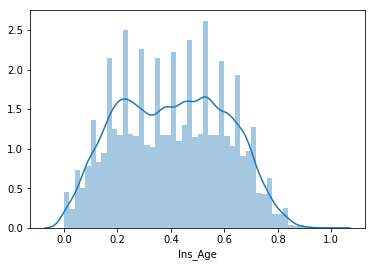

In [61]:
sns.distplot(data["Ins_Age"])
plt.show()

In [11]:
def bucke(x):
    if (x>=0) & (x<=0.2):
        return 0
    elif (x>.2) & (x<=.4):
        return 1
    elif (x>.4) & (x<=.6):
        return 2
    elif (x>.6) & (x<=.8):
        return 3
    else:
        return 4
data["buk_Ins_age"]=data["Ins_Age"].apply(bucke)

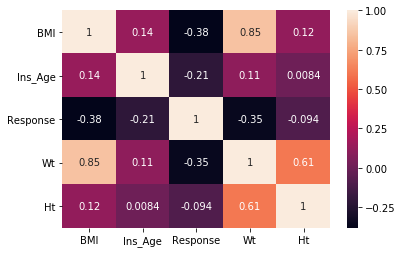

In [63]:
a1=data[["BMI","Ins_Age","Response","Wt","Ht"]]
sns.heatmap(a1.corr(),annot=True)
plt.show()


In [12]:
#sum of medical key words
med_key=data.columns[70:118]
data["Medical_Keyword_sum"]=0
for i in med_key:
    data["Medical_Keyword_sum"]=data["Medical_Keyword_sum"]+data[i]

In [13]:
#as we have BMI and ins_age as important feature lets make it to one column
data["BMI&INS_AGE"]=data["BMI"]*data["Ins_Age"]

In [14]:
#make sum of employment_info
data["Employment_Info_sum"]=data["Employment_Info_2"]+data["Employment_Info_3"]+data["Employment_Info_4"]+data["Employment_Info_5"]

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
datta=minmax.fit_transform(data)
datta=pd.DataFrame(datta,columns=data.columns)
# y=data["Response"]
# x=datta.drop("Response",axis=1)
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.1)
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# xtrain_res,ytrain_res=smote.fit_sample(x_train,y_train)
# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier()
# model_dt=dt.fit(xtrain_res,ytrain_res)
# imp=model_dt.feature_importances_
# feat=pd.DataFrame(imp).T
# im=datta.drop("Response",axis=1)
# feat.columns=im.columns
# feat.iloc[0,:].sort_values(ascending=False).head(20).plot(kind='barh')
# dtim=feat.iloc[0,:].sort_values(ascending=False).head(20)

we can see important features
keep medical_keyword_sum drop other medical keyword
drop ins_age and keep buk_Ins_Age
drop employement _info_sum as employment_info_6,1 more important


In [16]:
#drop all medical_keyword
med_key=datta.columns[71:119]
datta=datta.drop(med_key,axis=1)

In [19]:
#drop ins_age and sum_employment
datta=datta.drop(["Ins_Age","Employment_Info_sum"],axis=1)

In [20]:
#data set shape
datta.shape

(59381, 76)

In [ ]:
#new target varible

In [28]:
#cluster the target variable
def cluster(x):
    if x==8:
        return 4
    elif x>=6:
        return 3
    elif x>=4:
        return 2
    else:
        return 1
data["Response_clu"]=data["Response"].apply(cluster)

# spliting data

In [328]:
y=data["Response_clu"]
x=datta.drop("Response",axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_tes
t=train_test_split(x,y,random_state=0,test_size=.1)

In [21]:
eda_Do=data.to_csv("afeda.csv")

#smote

In [329]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrain_res,ytrain_res=smote.fit_sample(x_train,y_train)

In [359]:
a=pd.DataFrame(xtrain_res,columns=x.columns)
b=pd.DataFrame(ytrain_res,columns=["Response_clu"])
clus=a.join(b)

ValueError: Shape of passed values is (70240, 75), indices imply (70240, 70)

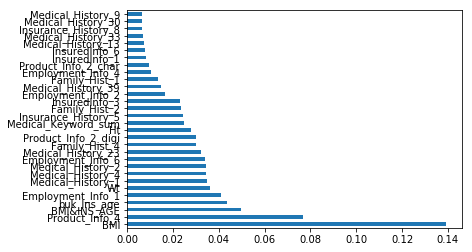

In [333]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain_res,ytrain_res)
imp=model_dt.feature_importances_
feat=pd.DataFrame(imp).T
im=datta.drop("Response",axis=1)
feat.columns=im.columns
feat.iloc[0,:].sort_values(ascending=False).head(30).plot(kind='barh')
dtim=feat.iloc[0,:].sort_values(ascending=False).head(30)

In [175]:
#Response_clu
y1=data["Response_clu"]
x=datta.drop("Response",axis=1)
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
dt=DecisionTreeClassifier()
model_dt_20=dt.fit(xtrain_res,ytrain_res)
#dt_pred=model_dt.predict(ytrain_res)
dt_pred_20=model_dt_20.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,dt_pred_20,weights="quadratic")))

The kappa score is 0.3997123603750964


In [194]:
#response
y1=data["Response"]
x=datta.drop("Response",axis=1)
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
dt=DecisionTreeClassifier()
model_dt_20=dt.fit(xtrain_res,ytrain_res)
#dt_pred=model_dt.predict(ytrain_res)
dt_pred_20=model_dt_20.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,dt_pred_20,weights="quadratic")))

The kappa score is 0.3427652332175436


The kappa score is 0.2943349652579056


In [334]:
#Response_clu random_forest
y1=data["Response_clu"]
x=datta[impor]
x2=clus[impor]
y2=clus["Response_clu"]
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
#xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf_20=rf.fit(x2,y2)
#dt_pred=model_dt.predict(ytrain_res)
rf_pred_20=model_rf_20.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,rf_pred_20,weights="quadratic")))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The kappa score is 0.49637623951642684


In [195]:
# #Response random_forest
# y1=data["Response"]
# x=datta.drop("Response",axis=1)
# from sklearn.model_selection import train_test_split
# x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
# xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
# from sklearn.ensemble import RandomForestClassifier
# rf=RandomForestClassifier(bootstrap=False, n_estimators=30)
# model_rf_20=rf.fit(xtrain_res,ytrain_res)
# #dt_pred=model_dt.predict(ytrain_res)
# rf_pred_20=model_rf_20.predict(x1_test)
# print("The kappa score is {}".format(cohen_kappa_score(y1_test,rf_pred_20,weights="quadratic")))

The kappa score is 0.49393808173080445


In [196]:
# #Response logistic regression
# y1=data["Response"]
# x=datta.drop("Response",axis=1)
# from sklearn.model_selection import train_test_split
# x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
# xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
# from sklearn.linear_model import LogisticRegression
# lr=LogisticRegression()
# model_lr=lr.fit(xtrain_res,ytrain_res)
# #dt_pred=model_dt.predict(ytrain_res)
# lr_pred=model_lr.predict(x1_test)
# print("The kappa score is {}".format(cohen_kappa_score(y1_test,lr_pred,weights="quadratic")))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The kappa score is 0.4704548056972815


In [337]:
#Response logistic regression
y1=data["Response_clu"]
x=datta[impor]
x2=clus[impor]
y2=clus["Response_clu"]
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
#xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(x2,y2)
#dt_pred=model_dt.predict(ytrain_res)
lr_pred=model_lr.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,lr_pred,weights="quadratic")))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The kappa score is 0.5198955788327787


# cross validation

In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [338]:
cv_scores_dt=[]
kappa_scorer = make_scorer(cohen_kappa_score)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_dt_20,x2,y2, cv=10,scoring=kappa_scorer)
cv_scores_dt.append(scores.mean())
print("cv_score value",cv_scores_dt)

cv_score value [0.3908504176157935]


In [339]:
cv_scores_lr=[]
kappa_scorer = make_scorer(cohen_kappa_score)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lr,x2,y2, cv=10,scoring=kappa_scorer)
cv_scores_lr.append(scores.mean())
print("cv_score value",cv_scores_lr)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

cv_score value [0.3690584662110858]


In [340]:
cv_scores_rf=[]
#y1=data["Response"]
#x=datta.drop("Response",axis=1)
#from sklearn.model_selection import train_test_split
#x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=10,test_size=.1)
#xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf_20,x2,y2, cv=10,scoring=kappa_scorer)
cv_scores_rf.append(scores.mean())
print("cv_score value",cv_scores_rf)

cv_score value [0.5029233105542901]


random forest is giving highest values so we can do boosting on them

In [341]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators =30)
gbcl = gbcl.fit(x2,y2)
test_pred = gbcl.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,test_pred,weights="quadratic")))

The kappa score is 0.5478522505622141


In [342]:
cv_scores_gb=[]
kappa_scorer = make_scorer(cohen_kappa_score)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbcl,x2,y2,cv=10,scoring=kappa_scorer)
cv_scores_gb.append(scores.mean())
print("cv_score value",cv_scores_gb)

cv_score value [0.47012148823082756]


In [346]:
#xgboost 
#!pip install xgboost
# import xgboost as xgb
# params = {"objective": "reg:linear",
#           "eta": 0.3,
#           "max_depth": 5,
#           "min_child_weight": 3,
#           "silent": 1,
#           "subsample": 0.7,
#           "colsample_bytree": 0.7,

#           "seed": 1}gbm = xgb.train(params,xgb.DMatrix(xtrain_res,ytrain_res))###
from xgboost import XGBClassifier
model_x= XGBClassifier()
mm_x=model_x.fit(a[impor],b)
test_pred_x =mm_x.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,test_pred_x,weights="quadratic")))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The kappa score is 0.5591191841255663


In [347]:
cv_scores_xg=[]
kappa_scorer = make_scorer(cohen_kappa_score)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mm_x,a[impor],b, cv=10,scoring=kappa_scorer)
cv_scores_xg.append(scores.mean())
print("cv_score value",cv_scores_xg)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

cv_score value [0.4933181473044799]


In [226]:
savx=pd.DataFrame(xtrain_res,columns=x.columns)
savy=pd.DataFrame(ytrain_res,columns=["Response"])
save_train=savx.join(savy)

In [229]:
save_test=x1_test.join(y1_test)
save_t=save_train.to_csv("save_train.csv")
save_tt=save_test.to_csv("save_test.csv")

# grid searchcv

In [348]:
#on random forest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC

kappa_scorer = make_scorer(cohen_kappa_score)
#grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, scoring=kappa_scorer)
#shareimprove this answer
param_grid=[{'n_estimators':[3,5,10,20,30,40],"bootstrap":[False],"max_features":[30,70,20,50]}]
rf=RandomForestClassifier()
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring=kappa_scorer)
grid_search.fit(x2,y2)
#return grid_search

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [349]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 20, 'n_estimators': 40}

In [350]:
grid_search.cv_results_

{'mean_fit_time': array([  2.42687092,   4.03357182,   7.94735832,  15.937642  ,
         23.71427226,  31.73053002,   5.40066562,   9.12155719,
         17.95647078,  35.97570415,  53.68628287,  71.51810446,
          1.67266622,   2.75577078,   5.46508226,  10.95336785,
         16.6898263 ,  33.07966514,   4.09932861,   8.03227673,
         27.49179072,  55.82264996,  80.80606918, 107.61319146]),
 'std_fit_time': array([ 0.10736525,  0.14040701,  0.16442036,  0.3929136 ,  0.52921563,
         0.7131807 ,  0.15111134,  0.12341474,  0.56975422,  1.06293184,
         1.47679168,  1.94604163,  0.0389601 ,  0.04652268,  0.09782306,
         0.20797433,  0.24301879, 10.95935958,  0.09208222,  1.77422479,
         0.83248139,  2.90879189,  2.51274079,  3.41429464]),
 'mean_score_time': array([0.04348207, 0.04979191, 0.06743894, 0.1267406 , 0.16943264,
        0.22217841, 0.03112512, 0.04234524, 0.06959734, 0.11467795,
        0.17161179, 0.22170691, 0.0319243 , 0.04084806, 0.07021108,
    

In [353]:
#Response_clu random_forest
y1=data["Response_clu"]
x=datta[impor]
x2=clus[impor]
y2=clus["Response_clu"]
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
#xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=False,max_features=20,n_estimators=40)
model_rf_20=rf.fit(x2,y2)
#dt_pred=model_dt.predict(ytrain_res)
rf_pred_20=model_rf_20.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,rf_pred_20,weights="quadratic")))

The kappa score is 0.553528543479126


In [355]:
print(classification_report(y1_test,rf_pred_20))

              precision    recall  f1-score   support

           1       0.57      0.46      0.51      1366
           2       0.52      0.39      0.45       686
           3       0.58      0.61      0.60      1958
           4       0.69      0.81      0.75      1929

    accuracy                           0.62      5939
   macro avg       0.59      0.57      0.57      5939
weighted avg       0.61      0.62      0.61      5939



In [356]:
clus=clus.to_csv("clus.csv")

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
sdatta=sc.fit_transform(datta)
sdatt=np.round(sdatta,4)
sdf=pd.DataFrame(sdatt,columns=datta.columns)
df=sdf[(sdf<3)&(sdf>-3)]
df1=df.dropna()
x=df1.drop("Response",axis=1)
y=data.loc[df1.index,"Response_clu"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.1)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
xtrain_res,ytrain_res=smote.fit_sample(x_train,y_train)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=False, n_estimators=30)
model_rf_tran=rf.fit(xtrain_res,ytrain_res)
#dt_pred=model_dt.predict(ytrain_res)
rf_pred=model_rf_tran.predict(x_test)
print("The kappa score is {}".format(cohen_kappa_score(y_test,rf_pred,weights="quadratic")))

The kappa score is 0.461679772134838


In [58]:
data.loc[df1.index,"Response_clu"]

1        2
2        4
3        4
4        4
6        4
7        1
8        4
9        1
17       3
20       4
21       2
23       4
24       3
25       4
26       3
27       4
28       3
29       3
30       2
32       3
33       2
37       1
41       1
48       2
49       1
50       1
51       3
52       3
54       3
55       2
        ..
59314    2
59316    4
59319    4
59321    4
59323    3
59327    3
59331    4
59333    1
59336    2
59339    1
59345    2
59346    2
59347    2
59348    4
59349    4
59350    3
59351    2
59354    3
59358    3
59361    1
59362    3
59364    1
59368    4
59370    2
59371    3
59375    4
59376    2
59377    3
59378    4
59380    3
Name: Response_clu, Length: 25771, dtype: int64

In [23]:
datta.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ht,Wt,BMI,Employment_Info_1,...,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Response,Product_Info_2_char,Product_Info_2_digi,buk_Ins_age,Medical_Keyword_sum,BMI&INS_AGE
0,0.0,0.243243,0.076923,0.0,0.0,0.0,0.581818,0.148536,0.323008,0.028,...,0.0,1.0,1.0,1.0,1.000000,0.75,0.285714,0.75,0.117647,0.257210
1,0.0,0.675676,0.076923,0.0,1.0,0.0,0.600000,0.131799,0.272288,0.000,...,0.0,1.0,1.0,0.0,0.428571,0.00,0.000000,0.00,0.000000,0.020169
2,0.0,0.675676,0.076923,0.0,1.0,0.0,0.745455,0.288703,0.428780,0.030,...,0.0,1.0,1.0,0.0,1.000000,1.00,0.000000,0.00,0.000000,0.015881
3,0.0,0.243243,0.487179,0.0,1.0,0.0,0.672727,0.205021,0.352438,0.042,...,0.0,1.0,1.0,0.0,1.000000,0.75,0.428571,0.00,0.058824,0.071793
4,0.0,0.675676,0.230769,0.0,1.0,0.0,0.654545,0.234310,0.424046,0.027,...,0.0,1.0,1.0,0.0,1.000000,0.75,0.142857,0.50,0.000000,0.219876


In [361]:
clus=pd.read_csv("clus.csv")
y1=data["Response_clu"]
x=datta[impor]
x2=clus[impor]
y2=clus["Response_clu"]
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
clf = SGDClassifier()
clf.fit(x2,y2)
clf_pred=clf.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,clf_pred,weights="quadratic")))

The kappa score is 0.5096711392458939


In [267]:
#on xgboosting
y1=data["Response"]
x=datta[impor]
# from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)

kappa_scorer = make_scorer(cohen_kappa_score)
#grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, scoring=kappa_scorer)
#shareimprove this answer
param_grid=[{'min_child_weight':[1,5,10],'gamma':[.5,1,1.5,2,5],'subsample':[.6,.8,1.0],"colsample_bytree":[.6,.8,1],"max_depth":[3,4,5]}]
xg=XGBClassifier(n_estimators=50)
grid_search=GridSearchCV(xg,param_grid,cv=5,scoring=kappa_scorer)
grid_search.fit(xtrain_res,ytrain_res)
#return grid_search

KeyboardInterrupt: 

In [271]:
y1=data["Response"]
x=datta.drop("Response",axis=1)
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=10,test_size=.1)
xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=False, n_estimators=30)
model_rf_20=rf.fit(xtrain_res,ytrain_res)
#dt_pred=model_dt.predict(ytrain_res)
rf_pred_20=model_rf_20.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,rf_pred_20,weights="quadratic")))

The kappa score is 0.4654646552137174


In [143]:
test_pred = gbcl.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,test_pred)))

The kappa score is 0.45116300533139


In [174]:
print("The kappa score is {}".format(cohen_kappa_score(test_pred,y1_test,weights="quadratic")))

The kappa score is 0.547774295408879


In [344]:
x1_test

,BMI,Product_Info_4,Medical_History_4,Wt,BMI&INS_AGE,Product_Info_2_digi,Employment_Info_1,Medical_History_1,Medical_History_2,Employment_Info_6,...,InsuredInfo_5,Medical_History_20,Medical_History_7,Product_Info_1,Medical_History_5,InsuredInfo_2,Medical_History_14,Product_Info_7,Medical_History_22,Medical_History_27
24148,0.484658,0.230769,0.0,0.288703,0.233354,0.142857,0.0750,0.233333,0.267388,0.140,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3881,0.447788,0.076923,1.0,0.257322,0.331695,1.000000,0.0640,0.025000,0.171561,0.100,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
31778,0.394875,0.487179,1.0,0.267782,0.248625,0.142857,0.3000,0.000000,0.698609,1.000,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
36442,0.516390,1.000000,1.0,0.330544,0.200818,0.428571,0.2000,0.029167,0.023184,0.000,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2349,0.366338,0.487179,1.0,0.240586,0.074624,0.000000,0.0600,0.070833,0.350850,0.250,...,0.0,0.5,1.0,0.0,0.0,0.0,0.5,0.0,1.0,1.0
19974,0.381030,0.230769,1.0,0.230126,0.246964,0.428571,0.0800,0.054167,0.003091,0.175,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
31110,1.000000,0.076923,1.0,0.602510,0.018519,0.428571,0.0250,0.025000,0.564142,0.250,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
24048,0.344016,0.230769,1.0,0.236402,0.203861,0.285714,0.1000,0.012500,0.425039,0.250,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
40667,0.523539,0.076923,0.0,0.372385,0.426587,0.142857,0.0500,0.029167,0.333849,0.650,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0
9034,0.466779,0.230769,1.0,0.225941,0.164237,0.142857,0.0150,0.004167,0.238022,0.000,...,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [168]:
y1_test-1

24148    3
3881     2
31778    3
36442    2
2349     3
19974    3
31110    0
24048    3
40667    0
9034     2
36212    2
19526    0
19902    3
48626    1
56420    3
54828    0
31866    2
58641    3
40755    3
8439     1
35432    0
6813     3
216      0
51428    1
45734    2
51107    3
59203    0
44088    3
12485    1
24912    0
        ..
38965    3
44906    2
50368    0
37675    2
32618    2
50894    0
33935    0
1761     3
26648    0
48932    3
521      2
21786    3
16504    1
23780    2
16563    3
36737    0
30324    0
9577     0
76       2
46858    0
36220    2
27295    3
41660    3
14206    0
16239    2
7690     3
37473    3
48599    2
49584    3
11420    3
Name: Response_clu, Length: 5939, dtype: int64

In [163]:
for i in y1_test:
    print(i)

4
3
4
3
4
4
1
4
1
3
3
1
4
2
4
1
3
4
4
2
1
4
1
2
3
4
1
4
2
1
2
4
1
4
4
4
4
3
3
1
2
4
4
3
4
4
3
1
4
3
3
2
1
2
4
3
4
4
1
3
3
3
3
3
1
4
3
4
1
4
4
3
2
3
1
3
1
2
3
4
1
3
4
3
1
1
1
4
3
1
3
3
1
1
3
4
1
4
3
3
1
1
4
3
1
1
3
1
4
4
4
4
4
4
1
1
1
4
1
1
4
1
1
2
2
1
3
3
3
2
3
4
1
3
3
3
4
3
4
3
1
4
3
2
3
4
4
1
3
3
2
1
3
4
1
4
1
4
1
3
4
4
1
2
4
4
1
1
4
3
4
4
3
1
3
2
2
3
1
3
4
4
3
3
4
1
4
1
4
4
4
4
4
2
4
4
2
3
4
1
3
4
3
3
3
4
4
3
1
4
3
1
4
3
3
1
1
4
3
1
4
2
4
1
2
3
3
3
1
3
1
1
4
1
4
2
4
3
2
4
4
1
3
4
4
1
4
1
3
1
3
1
3
4
4
3
4
3
1
4
2
1
3
3
3
3
1
1
4
3
3
4
2
2
3
3
3
4
4
2
3
3
3
2
3
3
4
1
1
1
3
4
3
4
1
1
1
1
3
4
2
1
1
3
4
1
1
3
3
4
1
4
3
4
3
2
2
1
1
2
3
4
3
2
1
1
4
2
3
3
4
4
3
3
3
2
4
4
1
2
1
2
1
1
2
4
4
3
2
4
1
4
3
3
4
4
4
3
1
2
4
3
1
4
4
1
3
1
3
3
4
1
3
1
4
1
1
2
4
3
2
2
3
2
4
3
4
3
4
4
2
3
3
1
2
4
4
1
1
1
3
3
4
4
1
4
3
3
3
4
4
3
1
4
1
3
4
4
3
3
1
1
3
3
1
4
4
1
1
3
1
2
3
4
3
1
4
1
4
3
4
4
4
4
4
4
1
3
3
1
1
4
4
3
3
4
2
4
4
4
4
3
3
3
4
4
3
4
2
3
1
3
3
3
3
4
4
4
4
1
3
4
4
1
4
3
4
4
3
2
4
4
3
1
3
4
2
3
4
3


2
1
3
4
1
1
4
3
4
1
3
3
4
2
4
1
1
1
4
3
1
4
2
4
2
2
4
4
4
3
4
4
3
4
4
1
4
3
3
1
4
2
4
3
3
2
1
4
2
3
3
3
3
4
2
2
1
1
4
4
4
3
4
1
3
1
4
2
4
1
2
3
1
4
4
4
3
4
2
3
3
3
4
3
4
4
2
1
3
4
3
3
3
3
2
3
1
1
3
4
4
4
3
3
3
4
4
3
4
4
4
3
4
3
3
2
1
4
3
4
3
4
4
4
4
2
1
4
4
3
3
4
3
3
1
3
4
4
4
3
1
4
1
4
3
3
3
2
4
4
3
3
3
4
4
1
4
4
2
4
3
4
2
3
2
3
3
1
3
4
3
1
4
4
4
1
3
1
1
3
4
3
3
4
4
3
3
2
1
4
1
1
4
4
3
4
4
4
2
4
1
3
4
4
3
3
4
1
2
4
4
2
3
1
4
4
3
1
3
1
3
3
3
3
4
3
3
4
2
4
3
1
4
3
2
2
3
3
2
1
4
4
3
4
4
4
4
1
4
3
1
2
1
4
2
4
1
1
3
4
4
3
1
4
4
3
4
2
4
4
3
4
3
3
4
1
4
3
4
3
1
4
3
3
4
1
3
1
3
4
3
3
4
2
4
4
1
4
4
4
4
1
3
2
1
3
4
4
3
4
2
1
3
3
2
3
4
3
3
3
1
1
4
4
3
4
4
1
1
4
3
3
3
4
4
1
4
4
3
2
2
1
1
1
3
3
1
4
3
3
4
4
4
4
1
2
3
3
4
3
3
3
3
3
2
1
4
3
2
4
1
4
3
4
1
3
3
4
3
4
3
3
1
3
4
3
1
4
4
3
1
4
3
1
3
4
3
4
2
4
1
4
3
4
3
1
3
4
1
4
3
1
1
4
1
2
4
3
4
2
3
1
1
3
1
4
3
1
3
3
2
1
4
1
2
3
1
4
4
4
1
3
3
2
2
1
1
4
2
4
4
1
4
4
1
3
4
3
4
1
2
4
3
1
3
1
4
4
4
3
4
4
1
4
1
4
2
2
4
3
4
1
3
4
1
2
3
3
4
1
3
1
3
4
2
4
4
1
3
2


In [165]:
m=np.zeros([4])

In [275]:
scores

array([0.69122321, 0.71070002, 0.72015321, 0.75226143, 0.80938799,
       0.81378861, 0.84980849, 0.84524489, 0.84369652, 0.84042727])

In [255]:
x=datta.drop("Response",axis=1)
#len(grid_search.best_estimator_.feature_importances_)
k=sorted(zip(grid_search.best_estimator_.feature_importances_,x.columns),reverse=True)

In [265]:
impor=[]
for i in range(34):
    impor.append(k[i][1])

In [264]:
y1=data["Response"]
x=datta[impor]
# from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y1,random_state=0,test_size=.1)
xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
# from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=False, n_estimators=30,max_features=20)
model_rf_20_fi=rf.fit(xtrain_res,ytrain_res)
#dt_pred=model_dt.predict(ytrain_res)
rf_pred_20_fi=model_rf_20_fi.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,rf_pred_20_fi,weights="quadratic")))


The kappa score is 0.31020724828274204


# new

In [315]:
dt=pd.read_csv("save_train.csv")

In [317]:
dt=dt.drop("Unnamed: 0",axis=1)


In [282]:
x=data.drop(["Response"],axis=1)
y=data["Response"]

In [321]:
#x_tra,x_cv_test,y_tra,y_cv_test=train_test_split(x,y,random_state=0,test_split=)


In [283]:
impor=[]
for i in range(70):
    impor.append(k[i][1])

In [325]:
x=dt[impor]
y=dt["Response"]
x1=datta[impor]
y1=data["Response_clu"]
# from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0,test_size=.1)
#xtrain_res,ytrain_res=smote.fit_sample(x1_train,y1_train)
# from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=False, n_estimators=30)
model_rf_20_fi=rf.fit(x,y)
#dt_pred=model_dt.predict(ytrain_res)
rf_pred_20_fi=model_rf_20_fi.predict(x1_test)
print("The kappa score is {}".format(cohen_kappa_score(y1_test,rf_pred_20_fi,weights="quadratic")))


The kappa score is 0.47898798794349284


In [326]:
print(classification_report(y1_test,rf_pred_20_fi))

              precision    recall  f1-score   support

           1       0.34      0.28      0.31       598
           2       0.31      0.23      0.27       671
           3       0.16      0.15      0.16        97
           4       0.23      0.32      0.27       141
           5       0.54      0.51      0.53       545
           6       0.41      0.39      0.40      1117
           7       0.39      0.33      0.36       841
           8       0.66      0.80      0.73      1929

    accuracy                           0.49      5939
   macro avg       0.38      0.38      0.38      5939
weighted avg       0.47      0.49      0.48      5939



In [345]:
a

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ht,Wt,BMI,Employment_Info_1,...,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Product_Info_2_char,Product_Info_2_digi,buk_Ins_age,Medical_Keyword_sum,BMI&INS_AGE
0,0.0,0.675676,0.076923,0.0,1.0,0.0,0.654545,0.194561,0.349332,0.020000,...,0.500000,0.0,1.000000,1.0,0.0,0.750000,0.285714,0.500000,0.058824,0.239357
1,0.0,0.675676,1.000000,0.0,1.0,0.0,0.709091,0.330544,0.537068,0.110000,...,0.500000,0.0,1.000000,1.0,0.0,0.750000,0.285714,0.500000,0.058824,0.278480
2,1.0,0.675676,1.000000,0.0,0.0,0.0,0.763636,0.403766,0.592976,0.250000,...,0.500000,0.0,1.000000,1.0,0.0,0.750000,0.428571,0.250000,0.000000,0.252564
3,0.0,0.675676,0.146839,0.0,0.0,0.0,0.654545,0.211297,0.380791,0.045500,...,0.500000,0.0,1.000000,1.0,1.0,0.000000,1.000000,0.500000,0.235294,0.260912
4,0.0,0.675676,0.076923,0.0,1.0,0.0,0.781818,0.435146,0.619684,0.055000,...,0.500000,0.0,1.000000,1.0,0.0,0.750000,0.285714,0.500000,0.000000,0.309842
5,0.0,0.675676,0.076923,0.0,1.0,0.0,0.690909,0.299163,0.503163,0.006000,...,0.500000,0.0,1.000000,1.0,0.0,0.750000,0.000000,0.000000,0.000000,0.018636
6,0.0,0.675676,0.076923,0.0,1.0,0.0,0.690909,0.267782,0.447648,0.018000,...,0.500000,0.0,1.000000,1.0,0.0,0.750000,0.142857,0.750000,0.058824,0.389620
7,0.0,0.675676,1.000000,0.0,0.0,0.0,0.600000,0.280335,0.579152,0.100000,...,0.500000,0.0,1.000000,1.0,1.0,0.750000,0.428571,0.000000,0.117647,0.139425
8,0.0,0.675676,0.487179,0.0,1.0,0.0,0.763636,0.278243,0.395231,0.023160,...,0.500000,0.0,1.000000,1.0,0.0,0.000000,0.714286,0.000000,0.000000,0.065872
9,0.0,0.675676,0.230769,0.0,1.0,0.0,0.636364,0.177824,0.333602,0.065000,...,0.500000,0.0,1.000000,1.0,0.0,0.750000,0.285714,0.500000,0.058824,0.185335
